# Lab 8: Define and Solve an ML Problem of Your Choosing

In [50]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [51]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(airbnbDataSet_filename)

df.head(10)

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7
5,"Lovely Room 1, Garden, Best Area, Legal rental","Beautiful house, gorgeous garden, patio, cozy ...",Neighborhood is amazing!<br />Best subways to ...,Laurie,"New York, New York, United States","Hello, \r\nI will be welcoming and helpful, w...",1.00,1.00,True,3.0,...,4.82,4.87,4.73,False,3,1,2,0,1.48,7
6,Only 2 stops to Manhattan studio,Comfortable studio apartment with super comfor...,NaN,Allen & Irina,"New York, New York, United States",We love to travel. When we travel we like to s...,1.00,1.00,True,1.0,...,4.80,4.67,4.57,True,1,1,0,0,1.24,7
7,UES Beautiful Blue Room,Beautiful peaceful healthy home<br /><br /><b>...,"Location: Five minutes to Central Park, Museum...",Cyn,"New York, New York, United States",Capturing the Steinbeck side of life in its Fi...,1.00,1.00,True,3.0,...,4.95,4.84,4.84,True,1,0,1,0,1.82,5
8,"Amazing location! Wburg. Large, bright & tranquil","Large, private loft-like room in a spacious 2-...","- One stop from the East Village, Lower East S...",Joelle,"New York, New York, United States",I have lived in the same apartment in Brooklyn...,1.00,0.00,True,2.0,...,5.00,5.00,5.00,False,2,0,2,0,0.07,5
9,Perfect for Your Parents: Privacy + Garden,"Parents/grandparents coming to town, or are yo...","Residential, village-like atmosphere. Lots of ...",Jane,"New York, New York, United States",I have been an Airbnb host since 2009 -- just ...,1.00,0.99,True,1.0,...,4.91,4.93,4.78,True,2,1,1,0,3.05,8


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

I have chosen the airbnbDataSet_filename data set and will predict whether a listing is “instant‑bookable.” This is a supervised learning problem because each record includes a ground‑truth label—either True or False—for “instant‑bookable.” It is a classification problem, as the target is categorical rather than continuous, and, more specifically, a binary classification because only two outcomes are possible. The features I plan to use include are 'host_response_rate', 'bedrooms' 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_group_cleansed','room_type', 'accommodates', 'price', 'minimum_nights', 'maximum_nights', 'host_listings_count','calculated_host_listings_count', 'number_of_reviews', 'review_scores_rating','review_scores_communication', 'review_scores_location', 'reviews_per_month', 'n_host_verifications'. Solving this problem matters because search results can prioritise listings that guests can book instantly, boosting user satisfaction and reducing checkout abandonment.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [52]:
df.dtypes

name                                             object
description                                      object
neighborhood_overview                            object
host_name                                        object
host_location                                    object
host_about                                       object
host_response_rate                              float64
host_acceptance_rate                            float64
host_is_superhost                                  bool
host_listings_count                             float64
host_total_listings_count                       float64
host_has_profile_pic                               bool
host_identity_verified                             bool
neighbourhood_group_cleansed                     object
room_type                                        object
accommodates                                      int64
bathrooms                                       float64
bedrooms                                        

In [53]:
df.isnull().sum().sort_values(ascending=False)

host_response_rate                              11843
host_acceptance_rate                            11113
host_about                                      10945
neighborhood_overview                            9816
bedrooms                                         2918
beds                                             1354
description                                       570
host_location                                      60
name                                                5
availability_60                                     0
availability_365                                    0
number_of_reviews                                   0
number_of_reviews_ltm                               0
number_of_reviews_l30d                              0
review_scores_rating                                0
review_scores_cleanliness                           0
availability_90                                     0
review_scores_location                              0
review_scores_checkin       

In [56]:
selected_features = [
    'host_is_superhost',
    'host_has_profile_pic',
    'host_identity_verified',
    'neighbourhood_group_cleansed',
    'room_type',
    'accommodates',
    'price',
    'minimum_nights',
    'maximum_nights',
    'host_listings_count',
    'calculated_host_listings_count',
    'number_of_reviews',
    'review_scores_rating',
    'review_scores_communication',
    'review_scores_location',
    'reviews_per_month',
    'n_host_verifications',
    'instant_bookable'
]

df = df[selected_features]

In [57]:
df.head(10)

,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,room_type,accommodates,price,minimum_nights,maximum_nights,host_listings_count,calculated_host_listings_count,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,reviews_per_month,n_host_verifications,instant_bookable
0,True,True,True,Manhattan,Entire home/apt,1,150.0,30,1125,8.0,3,48,4.70,4.79,4.86,0.33,9,False
1,True,True,True,Brooklyn,Entire home/apt,3,75.0,1,730,1.0,1,409,4.45,4.80,4.71,4.86,6,False
2,True,True,True,Brooklyn,Entire home/apt,4,275.0,5,1125,1.0,1,2,5.00,5.00,4.50,0.02,3,False
3,True,True,True,Manhattan,Private room,2,68.0,2,14,1.0,1,507,4.21,4.42,4.87,3.68,4,False
4,True,True,True,Manhattan,Private room,1,75.0,2,14,1.0,1,118,4.91,4.95,4.94,0.87,7,False
5,True,True,True,Brooklyn,Private room,2,98.0,4,21,3.0,3,204,4.70,4.82,4.87,1.48,7,False
6,True,True,True,Brooklyn,Entire home/apt,3,89.0,30,730,1.0,1,181,4.56,4.80,4.67,1.24,7,True
7,True,True,True,Manhattan,Private room,1,62.0,30,700,3.0,1,234,4.88,4.95,4.84,1.82,5,True
8,True,True,True,Brooklyn,Private room,1,90.0,27,45,2.0,2,9,4.86,5.00,5.00,0.07,5,False
9,True,True,True,Brooklyn,Entire home/apt,4,199.0,2,1125,1.0,2,280,4.87,4.91,4.93,3.05,8,True


In [59]:
bool_cols = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable']
df[bool_cols] = df[bool_cols].fillna(False).astype(int)


/tmp/ipykernel_1906/3038537287.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[bool_cols] = df[bool_cols].fillna(False).astype(int)


In [61]:
df.head(10)

,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,room_type,accommodates,price,minimum_nights,maximum_nights,host_listings_count,calculated_host_listings_count,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,reviews_per_month,n_host_verifications,instant_bookable
0,1,1,1,Manhattan,Entire home/apt,1,150.0,30,1125,8.0,3,48,4.70,4.79,4.86,0.33,9,0
1,1,1,1,Brooklyn,Entire home/apt,3,75.0,1,730,1.0,1,409,4.45,4.80,4.71,4.86,6,0
2,1,1,1,Brooklyn,Entire home/apt,4,275.0,5,1125,1.0,1,2,5.00,5.00,4.50,0.02,3,0
3,1,1,1,Manhattan,Private room,2,68.0,2,14,1.0,1,507,4.21,4.42,4.87,3.68,4,0
4,1,1,1,Manhattan,Private room,1,75.0,2,14,1.0,1,118,4.91,4.95,4.94,0.87,7,0
5,1,1,1,Brooklyn,Private room,2,98.0,4,21,3.0,3,204,4.70,4.82,4.87,1.48,7,0
6,1,1,1,Brooklyn,Entire home/apt,3,89.0,30,730,1.0,1,181,4.56,4.80,4.67,1.24,7,1
7,1,1,1,Manhattan,Private room,1,62.0,30,700,3.0,1,234,4.88,4.95,4.84,1.82,5,1
8,1,1,1,Brooklyn,Private room,1,90.0,27,45,2.0,2,9,4.86,5.00,5.00,0.07,5,0
9,1,1,1,Brooklyn,Entire home/apt,4,199.0,2,1125,1.0,2,280,4.87,4.91,4.93,3.05,8,1


<AxesSubplot: >

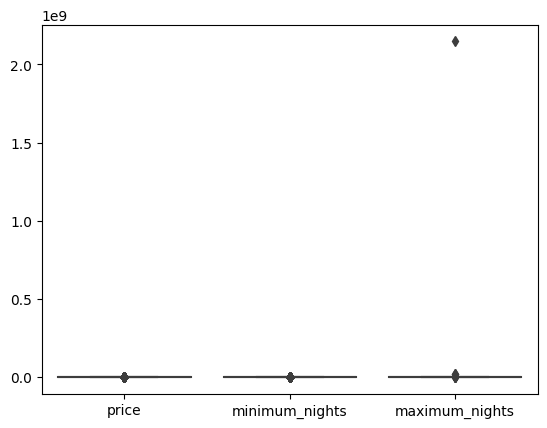

In [62]:
sns.boxplot(data=df[['price','minimum_nights','maximum_nights']])

In [63]:
df[['price', 'minimum_nights', 'maximum_nights']].describe().T

,count,mean,std,min,25%,50%,75%,max
price,28022.0,154.228749,1.408166e+02,29.0,70.0,115.0,180.0,1.000000e+03
minimum_nights,28022.0,18.689387,2.556915e+01,1.0,2.0,30.0,30.0,1.250000e+03
maximum_nights,28022.0,78695.412747,1.282973e+07,1.0,40.0,1124.0,1125.0,2.147484e+09


In [64]:
df.drop(columns=['minimum_nights', 'maximum_nights'], inplace=True)
df.head(10)

/tmp/ipykernel_1906/1245620689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['minimum_nights', 'maximum_nights'], inplace=True)


,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,room_type,accommodates,price,host_listings_count,calculated_host_listings_count,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,reviews_per_month,n_host_verifications,instant_bookable
0,1,1,1,Manhattan,Entire home/apt,1,150.0,8.0,3,48,4.70,4.79,4.86,0.33,9,0
1,1,1,1,Brooklyn,Entire home/apt,3,75.0,1.0,1,409,4.45,4.80,4.71,4.86,6,0
2,1,1,1,Brooklyn,Entire home/apt,4,275.0,1.0,1,2,5.00,5.00,4.50,0.02,3,0
3,1,1,1,Manhattan,Private room,2,68.0,1.0,1,507,4.21,4.42,4.87,3.68,4,0
4,1,1,1,Manhattan,Private room,1,75.0,1.0,1,118,4.91,4.95,4.94,0.87,7,0
5,1,1,1,Brooklyn,Private room,2,98.0,3.0,3,204,4.70,4.82,4.87,1.48,7,0
6,1,1,1,Brooklyn,Entire home/apt,3,89.0,1.0,1,181,4.56,4.80,4.67,1.24,7,1
7,1,1,1,Manhattan,Private room,1,62.0,3.0,1,234,4.88,4.95,4.84,1.82,5,1
8,1,1,1,Brooklyn,Private room,1,90.0,2.0,2,9,4.86,5.00,5.00,0.07,5,0
9,1,1,1,Brooklyn,Entire home/apt,4,199.0,1.0,2,280,4.87,4.91,4.93,3.05,8,1


In [65]:
#perform ont-hot encode for the categorical features in my dataset
categorical_cols = ['neighbourhood_group_cleansed','room_type']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_encoded

,host_is_superhost,host_has_profile_pic,host_identity_verified,accommodates,price,host_listings_count,calculated_host_listings_count,number_of_reviews,review_scores_rating,review_scores_communication,...,reviews_per_month,n_host_verifications,instant_bookable,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,1,1,1,1,150.0,8.0,3,48,4.70,4.79,...,0.33,9,0,0,1,0,0,0,0,0
1,1,1,1,3,75.0,1.0,1,409,4.45,4.80,...,4.86,6,0,1,0,0,0,0,0,0
2,1,1,1,4,275.0,1.0,1,2,5.00,5.00,...,0.02,3,0,1,0,0,0,0,0,0
3,1,1,1,2,68.0,1.0,1,507,4.21,4.42,...,3.68,4,0,0,1,0,0,0,1,0
4,1,1,1,1,75.0,1.0,1,118,4.91,4.95,...,0.87,7,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28017,1,1,1,2,89.0,8.0,8,1,5.00,5.00,...,1.00,2,1,0,0,1,0,0,1,0
28018,1,1,1,6,1000.0,0.0,1,2,5.00,5.00,...,2.00,5,0,1,0,0,0,0,0,0
28019,1,1,1,2,64.0,6.0,7,1,1.00,5.00,...,1.00,2,1,1,0,0,0,0,1,0
28020,1,1,1,3,84.0,3.0,3,1,5.00,5.00,...,1.00,7,0,1,0,0,0,0,0,0


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

I have a new feature list that I chose to keep after inspecting the data which include 'host_is_superhost', 'host_has_profile_pic',  'host_identity_verified', 'neighbourhood_group_cleansed', 'room_type', 'accommodates', 'price', 'host_listings_count',  'calculated_host_listings_count', 'number_of_reviews',  'review_scores_rating', 'review_scores_communication', 'review_scores_location', 'reviews_per_month', 'n_host_verifications'. So far, I’ve dropped the initial features I planned to use that had a lot of missing values. Additionally, I dropped 'minimum_nights' and 'maximum_nights' features because they had outliers and limited predictive value. Boolean columns were type-converted to int values. Finally, I implemented one-hot encoding for the categorical features 'neighbourhood_group_cleansed' and 'room_type'.

I plan to use a Gradient Boosted Decision Trees model to predict whether an Airbnb is instantly bookable. 
This will be implemented using scikit-learn’s 'GradientBoostingClassifier'. I will use 'train_test_split()' to divide the dataset and evaluate the model using ROC curve and AUC score. I will experiment with different 'max_depth' values and tune other  hyperparameters like 'learning_rate' and 'n_estimators' to improve model performance. If needed, I will apply cross-validation and check for class imbalance to ensure the model generalizes well to new data.


## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [66]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [76]:
X = df_encoded.drop('instant_bookable', axis=1)
y = df['instant_bookable']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=123)

In [78]:
#  GradientBoostingClassifier model with a max depth of 8 
gbdt_8_model = GradientBoostingClassifier(n_estimators = 50, max_depth = 8)

gbdt_8_model.fit(X_train, y_train)

gbdt_8_preds = gbdt_8_model.predict_proba(X_test)
gbdt_8_predictions = list(gbdt_8_preds[:, -1])

#  GradientBoostingClassifier model with a max depth of 14
gbdt_14_model = GradientBoostingClassifier(n_estimators = 50, max_depth = 14)

gbdt_14_model.fit(X_train, y_train)
 
gbdt_14_preds = gbdt_14_model.predict_proba(X_test)
gbdt_14_predictions = list(gbdt_14_preds[:, -1])

End


In [81]:
fpr_8, tpr_8, thresholds_8 = roc_curve(y_test, gbdt_8_predictions)

fpr_14, tpr_14, thresholds_14 = roc_curve(y_test, gbdt_14_predictions)


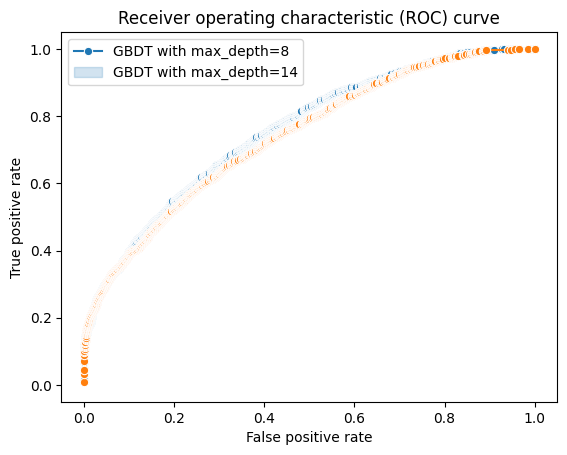

In [83]:
#plotting ROC curve
fig = plt.figure()
ax = fig.add_subplot(111)


sns.lineplot(x=fpr_8, y=tpr_8, marker = 'o')
sns.lineplot(x=fpr_14, y=tpr_14, marker = 'o')

plt.title("Receiver operating characteristic (ROC) curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(['GBDT with max_depth=8', 'GBDT with max_depth=14'])
plt.show()

In [85]:
auc_8 = auc(fpr_8, tpr_8)
auc_14 = auc(fpr_14, tpr_14)

print(f"AUC for max_depth=8: {auc_8:.4f}")
print(f"AUC for max_depth=14: {auc_14:.4f}")


AUC for max_depth=8: 0.7566
AUC for max_depth=14: 0.7405


In [86]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.05, 0.1],
    'n_estimators': [50, 100],
    'max_depth': [6, 8],
    'subsample': [0.8, 1.0]
}

grid = GridSearchCV(GradientBoostingClassifier(random_state=42),
                    param_grid,
                    scoring='roc_auc',
                    cv=3)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best AUC score (CV):", grid.best_score_)


Best parameters: {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 100, 'subsample': 0.8}
Best AUC score (CV): 0.7374415043391856


The GridSearchCV model with {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 100, 'subsample': 0.8} performed worse in terms of AUC score than the simpler model with max_depth=8 and n_estimators=50. This suggests that increasing complexity may have led to overfitting and did not improve generalization. The original max_depth=8 model (with 50 trees) actually performed best on unseen data. The simpler model can distinguish between bookable and non-bookable listings with ~76% accuracy on the probability ranking level. The ROC curve for the two models with max_depth=8 and max_depth=14 also confirms that both curves are well above the diagonal line, which means both perform much better than random guessing. The blue curve (max_depth=8) is slightly higher than the orange one (max_depth=14) across most thresholds.



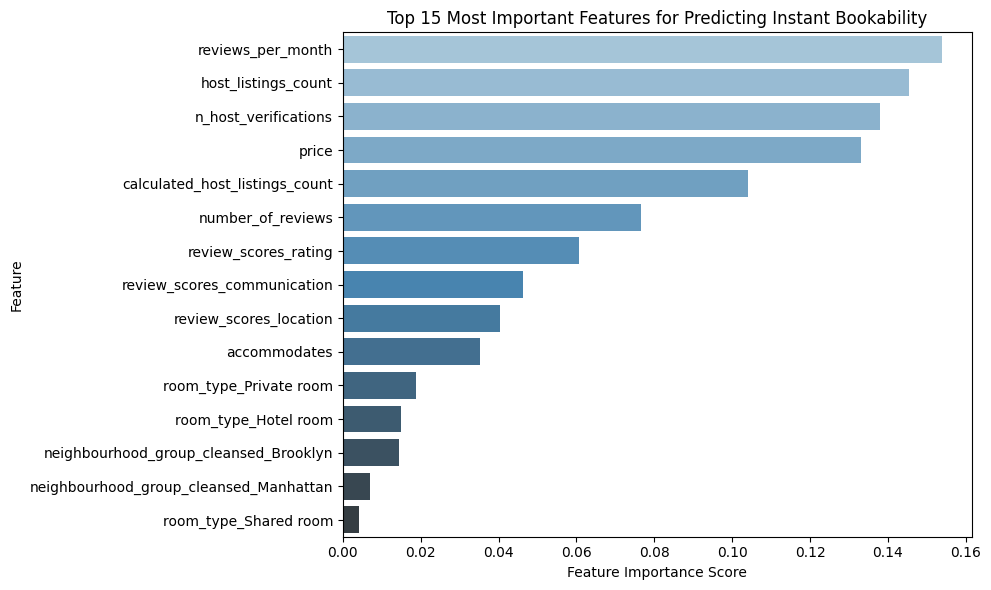

In [88]:
# In this part of the lab, I was curious to see which features were most important 
# in determining whether an Airbnb is instantly bookable. 
# The code below visualizes the features that are most influential in predicting instant bookability.

importances = gbdt_8_model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(15), x='Importance', y='Feature', palette='Blues_d')
plt.title('Top 15 Most Important Features for Predicting Instant Bookability')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()